In [15]:
import pandas as pd
# Importing the dataset
dataset = pd.read_csv('odi-winloss.csv')
X = dataset.iloc[:,[7,8,9,12,13,14]]
y = dataset.iloc[:, 15]


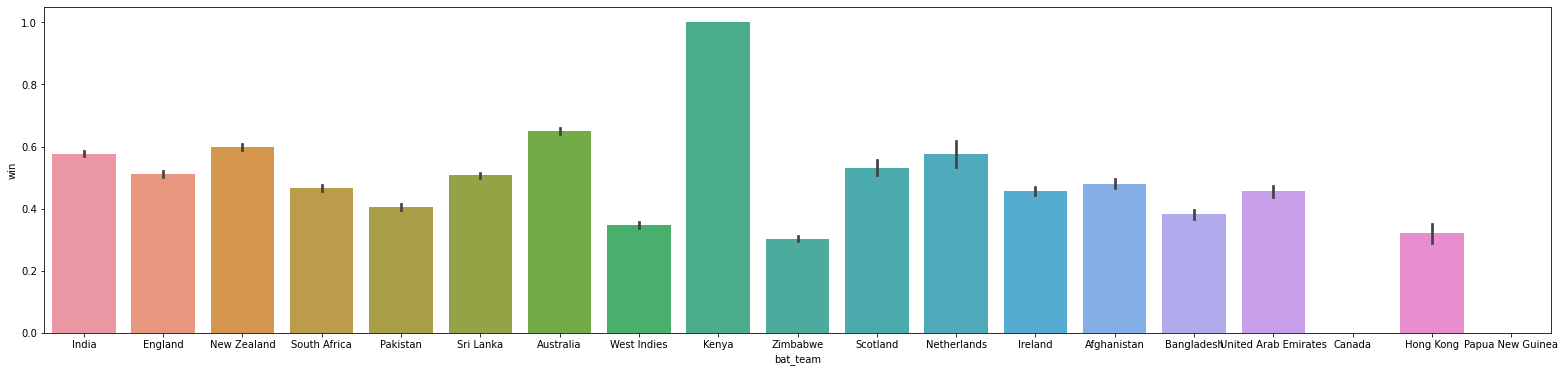

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(27, 6))
sns.barplot(x="bat_team",y="win",data=dataset)

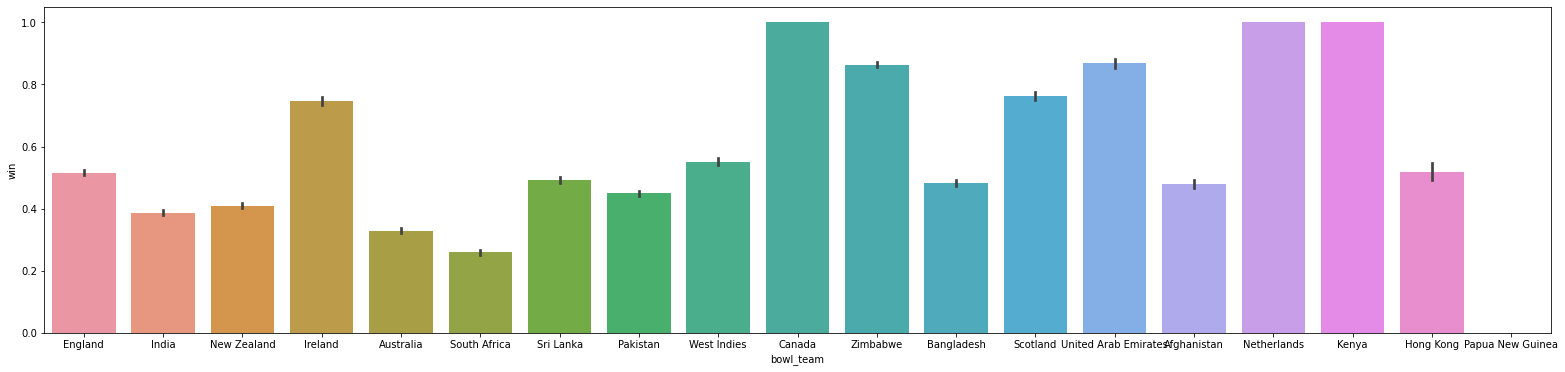

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(27, 6))
sns.barplot(x="bowl_team",y="win",data=dataset)

In [18]:
X.head()

,runs,wickets,overs,striker,non-striker,total
0,0,0,0.1,0,0,325
1,0,0,0.2,0,0,325
2,0,0,0.3,0,0,325
3,4,0,0.4,4,0,325
4,4,0,0.5,4,0,325


In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: win, dtype: int64

In [20]:
import pandas as pd
# Importing the dataset
dataset = pd.read_csv('odi-winloss.csv')
X = dataset.iloc[:,[7,8,9,12,13,14]].values
y = dataset.iloc[:, 15].values


In [21]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [23]:
# Training the dataset
from sklearn.linear_model import LogisticRegression
lin = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
lin.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [24]:
# Testing the dataset on trained model
from sklearn.metrics import accuracy_score
y_pred = lin.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
print(accuracy*100)

81.7021807631111


In [25]:
# Testing with a custom input
import numpy as np
new_prediction = lin.predict_proba(sc.transform(np.array([[100,2,10,23,52,200]])))
print(new_prediction[0][1]*100)

98.67193737226437


In [27]:
def predictChances(number1,number2,number3,number4,number5,number6):
    import numpy as np
    result = (lin.predict_proba(sc.transform(np.array([[number1,number2,number3,number4,number5,number6]])))[0][1]*100)
    return result
